In [1]:
import networkx as nx
import pandas as pd

# 1. Carica il file GEXF appena creato
# Assicurati che il nome file corrisponda a quello salvato nel main
filename = "dataset_indignazione.gexf" 

try:
    G = nx.read_gexf(filename)
    print(f"✅ File caricato! Nodi: {G.number_of_nodes()}, Archi: {G.number_of_edges()}")
except FileNotFoundError:
    print(f"❌ File {filename} non trovato.")

# --- VISUALIZZAZIONE ARCHI (Approccio C) ---
data_archi = []

# Iteriamo su tutti gli archi per estrarre i dati
for source, target, attributes in G.edges(data=True):
    row = {
        'Chi Risponde (Source)': source,
        'A Chi (Target)': target,
        'MAGNETE (Post Originale)': attributes.get('trigger_text', ''), # <--- La causa
        'REAZIONE (Risposta)': attributes.get('reply_content', '')      # <--- L'effetto
    }
    data_archi.append(row)

df_edges = pd.DataFrame(data_archi)

# --- VISUALIZZAZIONE ---
print("\n--- TEST APPROCCIO C: Causa ed Effetto ---")
# Opzione per leggere tutto il testo
pd.set_option('display.max_colwidth', None) 

# Mostriamo le prime 5 righe
# Dovresti vedere che per lo stesso Target, il "Magnete" è identico
display(df_edges.head(5))

# Verifica rapida: Contiamo quanti archi hanno lo stesso "Magnete"
# Questo simula la tua futura analisi di popolarità
if not df_edges.empty:
    print("\n--- TOP MAGNETI (Post che hanno attirato più risposte) ---")
    top_magneti = df_edges['MAGNETE (Post Originale)'].value_counts().head(3)
    for text, count in top_magneti.items():
        print(f"\n🔥 {count} Risposte al post che dice:\n'{text[:100]}...'")
        
        
        
# --- VISUALIZZAZIONE NODI (Gli Utenti) ---
data_nodi = []

# Iteriamo su tutti i nodi per estrarre gli attributi anagrafici
for node_id, attributes in G.nodes(data=True):
    row = {
        'Utente': node_id,
        'Followers': attributes.get('followers', 0),
        'Posts Totali': attributes.get('posts', 0)
    }
    data_nodi.append(row)

df_nodes = pd.DataFrame(data_nodi)

# --- VISUALIZZAZIONE ---
print("\n--- DATI DEI NODI (Utenti) ---")
# Mostriamo i primi 5 utenti ordinati per numero di followers
display(df_nodes.sort_values(by='Followers', ascending=False).head(5))

✅ File caricato! Nodi: 622, Archi: 706

--- TEST APPROCCIO C: Causa ed Effetto ---


,Chi Risponde (Source),A Chi (Target),MAGNETE (Post Originale),REAZIONE (Risposta)
0,tahoemarta,squaresquirrel,"#Greenland #NATO #Denmark #Venezuela #Canada #Epstein #ICE \n#immigrants #Ukraine \n\nTrump is a monster, think of the fear and mortal dread he has instilled in the hearts of millions world wide. [IMG: Am image of protests against America in Greenland]","As Gavin said: “This Greenland exercise is a joke, there’s no other way to color it. He’s also painting himself into a corner, it’s so damn obvious. He’s not going to invade and he doesn’t have that many cards to play and so this is an opportunity for the European Union to punch him in the face.”"
1,truskofficial,cartoonmovement.com,"Manchild. Today's cartoon by Deniz O. Ilhan. More cartoons: www.cartoonmovement.com\n\n#Trump #manchild #Greenland #Venezuela #NobelPeacePrize [IMG: Cartoon showing Trump as a toddler sitting on the ground, sucking on a pacifier shaped like the Nobel Peace Prize, while highly holding a ball with the flag of Greenland on it. Next to him is a bottle of milk with the flag of Venezuela on it.]",Is that a Countryball?
2,cyndicate,buchanan.today,A thought for #WeedWednesday. Can you honestly tell me I’m wrong??\n\n#cannabis #FreeTheWeed #Greenland #Venezuela #Iran #Minnesota #Canada #Mexico,Who's supplying the snacks?
3,gothicalchemist,buchanan.today,A thought for #WeedWednesday. Can you honestly tell me I’m wrong??\n\n#cannabis #FreeTheWeed #Greenland #Venezuela #Iran #Minnesota #Canada #Mexico,"George Carlin said that when weed swept the neighborhood, in one semester in shop class the kids went from making zip guns to making hash pipes.."
4,grotwort,buchanan.today,A thought for #WeedWednesday. Can you honestly tell me I’m wrong??\n\n#cannabis #FreeTheWeed #Greenland #Venezuela #Iran #Minnesota #Canada #Mexico,I'm in. Let me know when.



--- TOP MAGNETI (Post che hanno attirato più risposte) ---

🔥 54 Risposte al post che dice:
'Noch niemand, der mit dem #Friedensnobelpreis ausgezeichnet wurde, hat sich so unwürdig verhalten wi...'

🔥 45 Risposte al post che dice:
'Well, tRump got his Nobel Peace Prize, but it’s still not his. He’ll take it anyway, but it’s still ...'

🔥 38 Risposte al post che dice:
'おはようユンボ
令和8年1月22日 木曜日
谷の神社を守るユンボ
#AIイラスト #aiart...'

--- DATI DEI NODI (Utenti) ---


,Utente,Followers,Posts Totali
0,tahoemarta,0,0
417,binaryorhex,0,0
410,ronsupportsyou.mastodon.social.ap.brid.gy,0,0
411,jestagirl,0,0
412,riverparkmatt,0,0


🧠 Analisi del sentiment in corso...


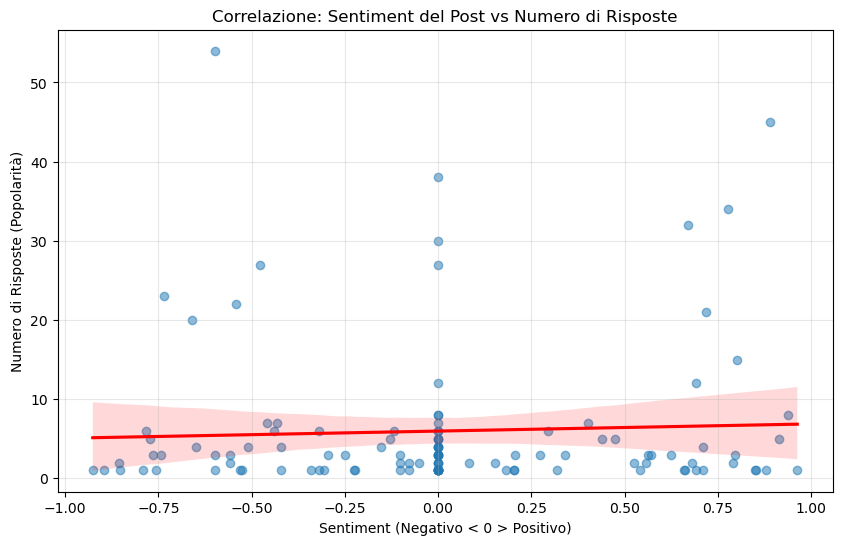


🔥 TOP 5 POST NEGATIVI (Potenziale Indignazione):


,sentiment_magnete,numero_risposte
MAGNETE (Post Originale),,
"The abduction of Venezuela’s president is a warning sign: when global rules collapse and impunity takes hold, violence becomes precedent, writes Refaat Ibrahim.\n#Venezuela #InternationalLaw #Gaza #PearlsAndIrritations",-0.9260,1
"""The word we use for that is murder."" \n\nOn the latest #AmericanFriction, @bcfinucane.bsky.social breaks down the Trump administration's illegal strikes on Venezuela. \n\nCheck out the full deep dive here: linktr.ee/americanfriction\n\n#Trump #ForeignPolicy #Venezuela #NationalSecurity #Politics #News",-0.8957,1
"hach ja. #russland als sogenannte grossmacht. also, dekonstruktion macht schon spass! 😝 und danke an alle follower für die lobenden worte! und das gleiche gilt für die welt #venezuela, #iran, #Groenland sind komplexer als so manche talkshow darstellt.\n\nwww.youtube.com/watch?v=i6YP...",-0.8550,2
"/1\nkriminelle an der macht... \nder österr. ex-bundeskanzler hat damit kein problem. #venezuela\n\n""1600 people who committed crimes for donald trump were pardoned by donald trump on his first day in office one year ago including the people who beat policemen to death and tried to kill mike pence"".",-0.8519,1
"""Three-quarters of the world's forcibly displaced people live in countries that are heavily impacted by climate change.""\n\n""By 2050, most refugee settlements will experience twice as many days of dangerous heat as they did in 2024.""\n#Bangladesh #Myanmar #Syria #Climate #Military #Genocide #Torture",-0.7906,1


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inizializziamo l'analizzatore
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not text: return 0
    # Il punteggio 'compound' va da -1 (odio/rabbia) a +1 (gioia/supporto)
    return analyzer.polarity_scores(text)['compound']

# 2. Applichiamo l'analisi al DataFrame degli archi
print("🧠 Analisi del sentiment in corso...")
df_edges['sentiment_magnete'] = df_edges['MAGNETE (Post Originale)'].apply(get_sentiment)
df_edges['sentiment_reazione'] = df_edges['REAZIONE (Risposta)'].apply(get_sentiment)

# sort df_edges by MAGNETE (Post Originale)
df_edges = df_edges.sort_values(by='MAGNETE (Post Originale)')

# 3. AGGREGAZIONE: Calcoliamo la popolarità per ogni post originale
# Raggruppiamo per il testo del magnete e contiamo quanti archi (risposte) ha attirato
df_popolarita = df_edges.groupby('MAGNETE (Post Originale)').agg({
    'sentiment_magnete': 'first', # Il sentiment del post è lo stesso per tutte le sue risposte
    'Chi Risponde (Source)': 'count' # Contiamo le risposte
}).rename(columns={'Chi Risponde (Source)': 'numero_risposte'})

# 4. VISUALIZZAZIONE: Correlazione Sentiment vs Popolarità
plt.figure(figsize=(10, 6))
sns.regplot(data=df_popolarita, x='sentiment_magnete', y='numero_risposte', 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title("Correlazione: Sentiment del Post vs Numero di Risposte")
plt.xlabel("Sentiment (Negativo < 0 > Positivo)")
plt.ylabel("Numero di Risposte (Popolarità)")
plt.grid(True, alpha=0.3)
plt.show()

# Vediamo i 5 post più negativi che hanno generato traffico
print("\n🔥 TOP 5 POST NEGATIVI (Potenziale Indignazione):")
display(df_popolarita.sort_values(by='sentiment_magnete').head(5))